自転車の現在地とホームポジションデータをランダムに生成

In [45]:
import pandas as pd
import numpy as np

# シード値を設定
np.random.seed(4)

# 自転車の位置情報をランダムに生成
num_positions = 5  # 10個の位置情報を生成
min_coord, max_coord = 0, 100  # 座標の範囲（0から100）
home_positions = [(np.random.randint(min_coord, max_coord), np.random.randint(min_coord, max_coord)) for _ in range(num_positions)]

# 現在地情報（座標）をランダムに生成
current_locations = [(np.random.randint(min_coord, max_coord), np.random.randint(min_coord, max_coord)) for _ in range(num_positions)]

# データフレームを作成
data = {
    'Home Position': home_positions,
    'Current Location': current_locations
}

df = pd.DataFrame(data)

# Current Location == Home Positionの場合のデータを追加
num_same_positions = 5
same_locations =[(np.random.randint(min_coord, max_coord), np.random.randint(min_coord, max_coord)) for _ in range(num_same_positions)]
new_row = pd.DataFrame({'Home Position': same_locations, 'Current Location': same_locations})
df = pd.concat([df, new_row], ignore_index=True)

df


,Home Position,Current Location
0,"(46, 55)","(55, 55)"
1,"(69, 1)","(57, 36)"
2,"(87, 72)","(50, 44)"
3,"(50, 9)","(38, 52)"
4,"(58, 94)","(3, 0)"
5,"(55, 21)","(55, 21)"
6,"(21, 73)","(21, 73)"
7,"(38, 56)","(38, 56)"
8,"(66, 46)","(66, 46)"
9,"(30, 8)","(30, 8)"


自転車の現在地とホームポジションまでの方向をプロット

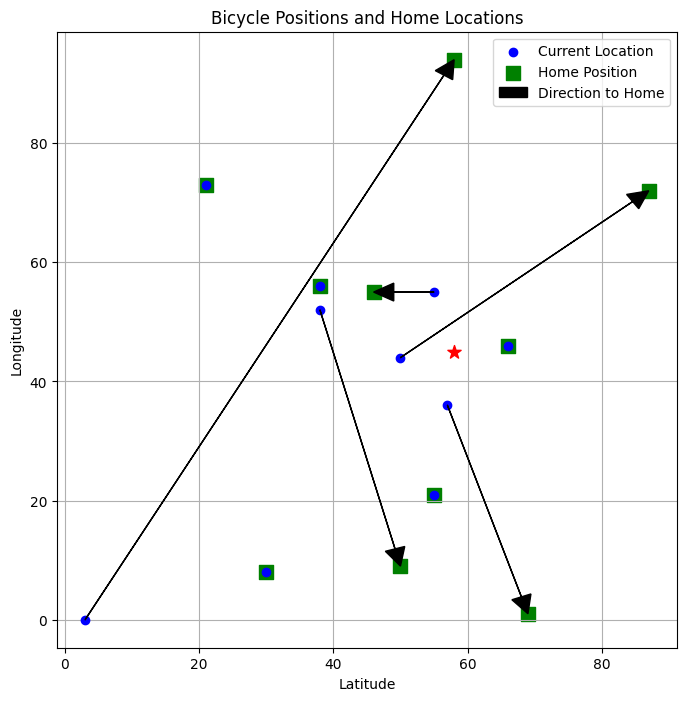

In [48]:
import matplotlib.pyplot as plt

# プロットを作成
plt.figure(figsize=(8, 8))
for index, row in df.iterrows():
    plt.scatter(row['Current Location'][0], row['Current Location'][1], marker='o', color='blue', zorder=2)  # 現在地をプロット
    plt.scatter(row['Home Position'][0], row['Home Position'][1], marker='s', color='green', s=100, zorder=1)  # 自宅位置をプロット
    # 見やすさの観点から矢印の長さを短くしてプロット
    plt.arrow(row['Current Location'][0], row['Current Location'][1],
              row['Home Position'][0] - row['Current Location'][0],
              row['Home Position'][1] - row['Current Location'][1],
              head_width=3, head_length=3, fc='black', ec='black', length_includes_head=True, zorder=3)  # 矢印をプロット

# Userの位置を指定してプロット
user_position = (58, 45)
plt.scatter(user_position[0], user_position[1], marker='*', color='red', s=100, zorder=3)

plt.xlabel('Latitude')  # y軸をLatitudeに設定
plt.ylabel('Longitude')  # x軸をLongitudeに設定
plt.title('Bicycle Positions and Home Locations')
plt.grid(True)
plt.legend(['Current Location', 'Home Position', 'Direction to Home'])
plt.show()